In [25]:
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.graph_objects as go
import plotly
import openpyxl

*__Среднемесячная зарплата будет получена из отредактированной версии за 2000-2017 год__*

In [26]:
dat = pd.read_excel('data/saldat.xlsx', header = 1)
dat['Наименование отрасли'] = dat['Наименование отрасли'].apply(lambda x: x.strip())
dat

,Наименование отрасли,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,"Сельское, лесное хозяйство, охота, рыболовство",985.1,1434.6,1876.4,2339.8,3015.4,3646.2,4568.7,6143.8,8474.8,...,17724,19721,21755,25671.1,28699,31727.6,34770,39436.8,46777.0,52868.3
1,Рыболовство и рыбоводство,2845.6,3839.3,5031.3,5444.5,7084.9,10233.5,12310.8,14797.0,19498.9,...,37062,46676,54927,68032.0,75766,88603.8,94983,101547.4,121726.2,139520.0
2,Добыча полезных ископаемых,5940.2,9099.2,11080.9,13912.4,16841.7,19726.9,23145.2,28107.5,33206.1,...,58959,63695,69936,74474.1,83178,89343.7,95359,103473.5,118375.7,130825.6
3,Добыча угля,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,...,66780,71418,77586,53065.0,59439,63352.8,62600,73576.6,90716.5,106102.6
4,Добыча нефти и природного газа,6985.1,10905.4,13080.3,16135.5,19903.3,23455.9,27614.5,33275.5,39051.3,...,66780,71418,77586,104078.3,127771,135363.7,142175,149585.1,165623.8,180514.7
5,Добыча металлических руд,3999.5,5386.5,7035.0,9395.7,10876.6,13176.0,15363.7,19092.7,22937.4,...,44441,48724,54513,61121.9,70721,78519.9,88154,96365.2,108316.6,119578.2
6,Обрабатывающие производства,2365.2,3446.6,4439.1,5603.4,6848.9,8420.9,10198.5,12878.7,16049.9,...,29511,31910,34592,38501.5,40722,43855.0,46510,52409.6,60438.7,71273.3
7,Производство пищевых продуктов,2183.4,3126.7,4065.9,5026.7,6065.8,7303.8,8806.7,11069.2,13930.4,...,25081,26793,28779,29920.1,32272,35175.0,37589,42604.5,48466.9,56502.8
8,Производство напитков,2183.4,3126.7,4065.9,5026.7,6065.8,7303.8,8806.7,11069.2,13930.4,...,25081,26793,28779,37933.7,40305,43204.1,45435,49861.5,57248.3,66326.5
9,Производство табачных изделий,2183.4,3126.7,4065.9,5026.7,6065.8,7303.8,8806.7,11069.2,13930.4,...,25081,26793,28779,94767.9,100426,104081.7,112017,108429.9,126445.9,140517.7


In [27]:
data = dat.iloc[-3:,:]
data

,Наименование отрасли,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
28,"Обеспечение электрической энергией, газом и па...",3156.5,4434.8,5869.4,7235.3,8641.8,10637.3,12827.5,15587.3,19057.4,...,34808,36865,39629,44631.7,47482,50381.5,53157,57804.2,65452.0,74351.4
29,Строительство,2639.8,3859.3,4806.9,6176.7,7304.7,9042.8,10869.2,14333.4,18574.0,...,29354,29960,32332,33677.9,38518,42629.9,44738,51944.2,60849.5,68944.4
30,Торговля оптовая и розничная; ремонт автотранс...,1584.5,2294.9,3068.9,3974.2,4906.2,6552.1,8234.9,11476.3,14927.4,...,25601,26947,30030,32092.5,35444,40137.0,41867,50388.8,57806.1,63572.2


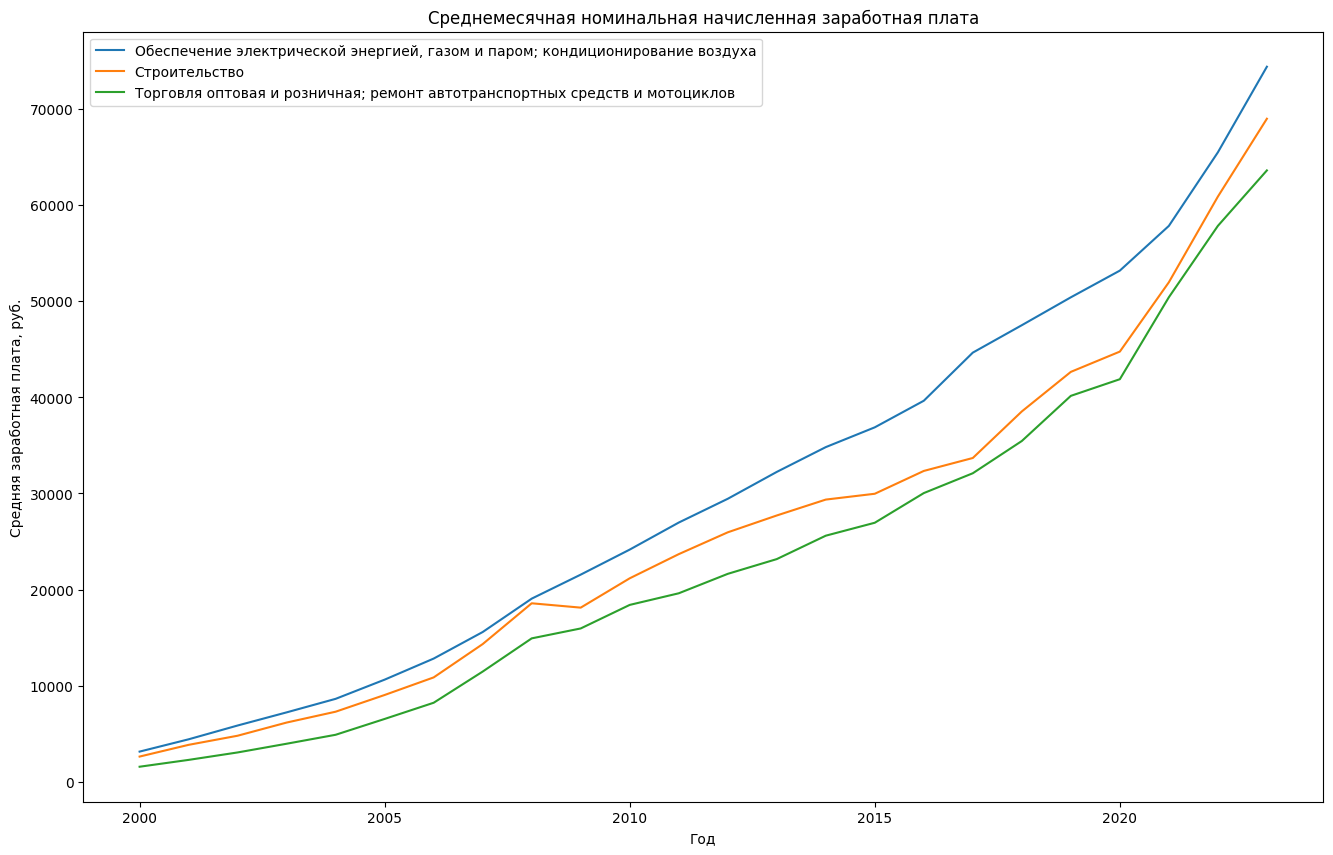

In [28]:
# Список сфер
spheres = [
    "Обеспечение электрической энергией, газом и паром; кондиционирование воздуха",
    "Строительство",
    "Торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов"
]
plt.figure(figsize=(16, 10))
for sphere in spheres:
    data_sphere = data[data['Наименование отрасли'] == sphere]
    data_sphere = data_sphere.drop(columns=['Наименование отрасли'])
    data_sphere_long = data_sphere.melt(var_name='Год', value_name='Зарплата')
    sns.lineplot(data=data_sphere_long, x='Год', y='Зарплата', label=sphere)

plt.title('Среднемесячная номинальная начисленная заработная плата')
plt.xlabel('Год')
plt.ylabel('Средняя заработная плата, руб.')
plt.legend()
plt.show()


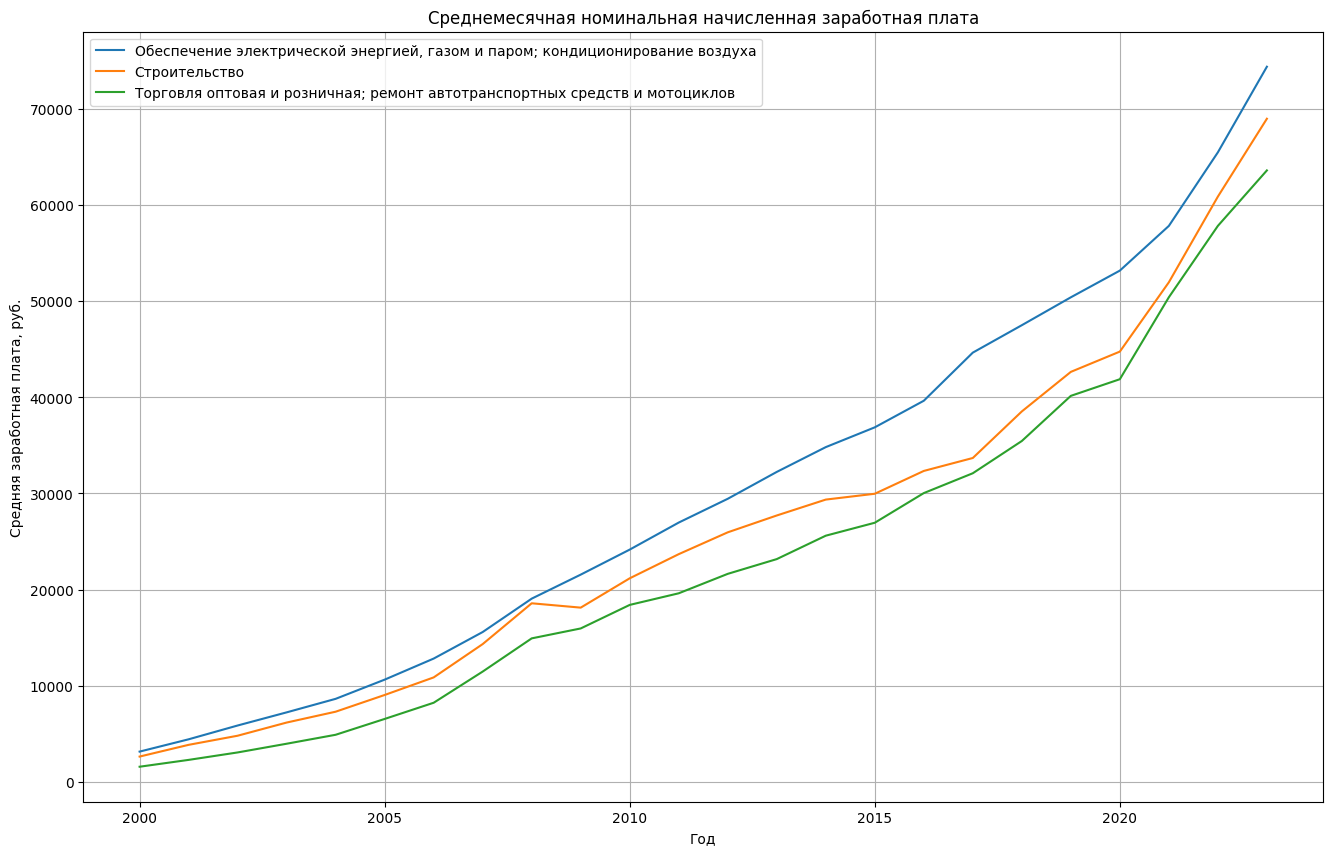

In [29]:
plt.figure(figsize=(16, 10))
for sphere in spheres:
    data_sphere = data[data['Наименование отрасли'] == sphere]
    data_sphere = data_sphere.drop(columns=['Наименование отрасли'])
    data_sphere_long = data_sphere.melt(var_name='Год', value_name='Зарплата')
    sns.lineplot(data=data_sphere_long, x='Год', y='Зарплата', label=sphere)
plt.title('Среднемесячная номинальная начисленная заработная плата')
plt.xlabel('Год')
plt.ylabel('Средняя заработная плата, руб.')
plt.grid(True)
plt.legend()
plt.show()


In [30]:
for sphere in spheres:
    data_sphere = data[data['Наименование отрасли'] == sphere]
    mean_val = (data_sphere[2023] / data_sphere[2000]).iloc[0]
    print(data_sphere.iloc[0,0], mean_val)

Обеспечение электрической энергией, газом и паром; кондиционирование воздуха 23.555013464280055
Строительство 26.117281612243346
Торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов 40.121300094667085


In [31]:
d2023 = pd.read_excel('data/tab3-zpl_2023.xlsx', sheet_name='с 2017 г.')
d2023['Наименование отрасли'] = d2023['Наименование отрасли'].apply(lambda x: x.strip().capitalize())
d2023

,Наименование отрасли,2017,2018,2019,2020,2021,2022,2023
0,Всего,39167.0,43724,47866.8,51344,57243.7,65338.3,73709.3
1,"Сельское, лесное хозяйство, охота, рыболовство...",25671.1,28699,31727.6,34770,39436.8,46777.0,52868.3
2,"Растениеводство и животноводство, охота и пред...",23529.1,25820,28395.8,31058,35460.2,41993.7,47582.9
3,Лесоводство и лесозаготовки,27616.6,32701,35426.2,37855,42151.8,48327.2,52416.3
4,Рыболовство и рыбоводство,68032.0,75766,88603.8,94983,101547.4,121726.2,139520.0
5,Добыча полезных ископаемых,74474.1,83178,89343.7,95359,103473.5,118375.7,130825.6
6,Добыча угля,53065.0,59439,63352.8,62600,73576.6,90716.5,106102.6
7,Добыча нефти и природного газа,104078.3,127771,135363.7,142175,149585.1,165623.8,180514.7
8,Добыча металлических руд,61121.9,70721,78519.9,88154,96365.2,108316.6,119578.2
9,Обрабатывающие производства,38501.5,40722,43855.0,46510,52409.6,60438.7,71273.3


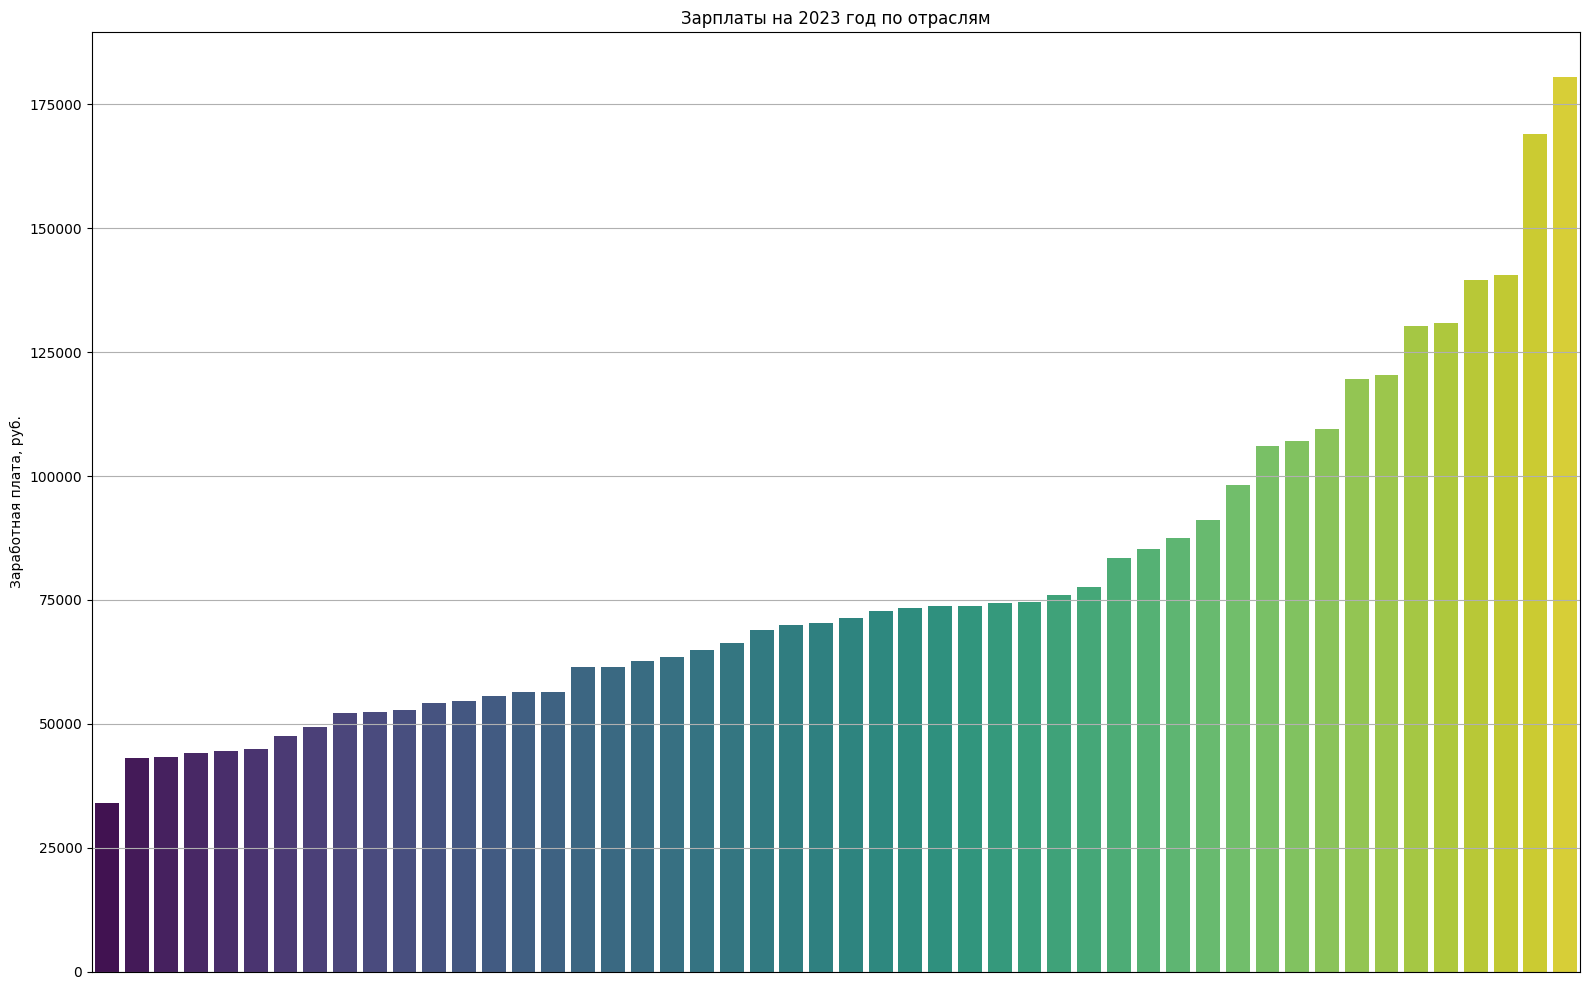

In [32]:
salaries_2023 = d2023[['Наименование отрасли', 2023]]
salaries_2023_sorted = salaries_2023.set_index('Наименование отрасли').sort_values(by=2023)
plt.figure(figsize=(16, 10))
sns.barplot(x=salaries_2023_sorted.index, y=2023, data=salaries_2023_sorted, palette='viridis')
plt.title('Зарплаты на 2023 год по отраслям')
plt.ylabel('Заработная плата, руб.')
plt.xlabel(None)
plt.grid(True, axis='y')
plt.xticks(ticks=[], labels=[])
plt.tight_layout()
plt.show()


***Выводы:***

__Полученные данные позволяют нам заключить, что средняя номинальная зарплата с течением времени многократно увеличилась.__
__Как можно видеть из визуализации на момент 2023 года самая высокая зарплата в добывающей промышленности нефти и газа, наименьшая зарплата в промышленности, производящей одежду.__

In [33]:
inf = pd.read_excel('data/inflation.xlsx', index_col='Год')
inf = inf['Всего']
inf.name = 'Инфляция'
inf = inf.iloc[1:]
inf = inf.sort_index()

In [34]:
# учитываем инфляцию напрямую
def discount(year_from, year_to, total):
    result = total
    for x in range(year_from, year_to, -1):
        result /= 1.0 + inf.loc[x] / 100.0
    return result


# учитываем инфляцию наоборот
def compound(year_from, year_to, total):
    result = total
    for x in range(year_from, year_to):
        result *= 1.0 + inf.loc[x] / 100.0
    return result

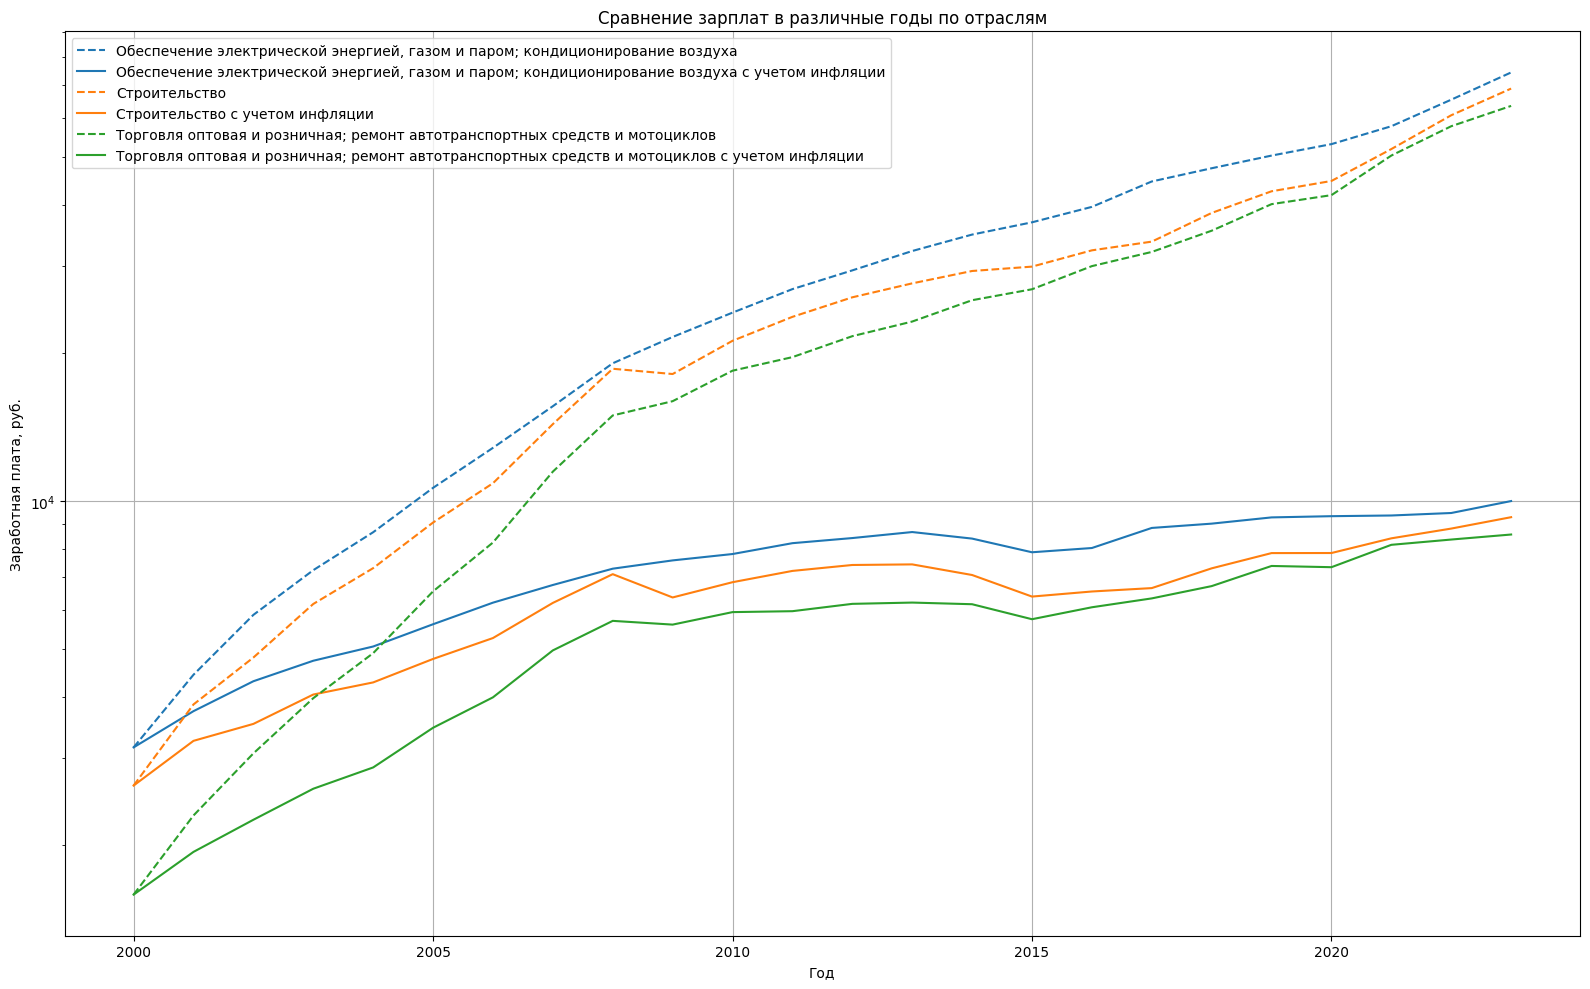

In [35]:
d2000 = data.copy()
for year in range(2000, 2024):
    d2000[year] = discount(year, 2000, d2000[year])
plt.figure(figsize=(16, 10))
colors = plt.cm.tab10.colors
color_index = 0
for sphere in spheres:
    dt = data[data['Наименование отрасли'] == sphere].drop(columns=['Наименование отрасли']).squeeze()
    dt_index = dt.index.map(int)
    dt_real = d2000[d2000['Наименование отрасли'] == sphere].drop(columns=['Наименование отрасли']).squeeze()
    dt_real_index = dt_real.index.map(int)
    plt.plot(dt_index, dt.values, label=sphere, linestyle='--', color=colors[color_index])
    plt.plot(dt_real_index, dt_real.values, label=sphere + ' с учетом инфляции', color=colors[color_index])
    color_index += 1
plt.title('Сравнение зарплат в различные годы по отраслям')
plt.xlabel('Год')
plt.ylabel('Заработная плата, руб.')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

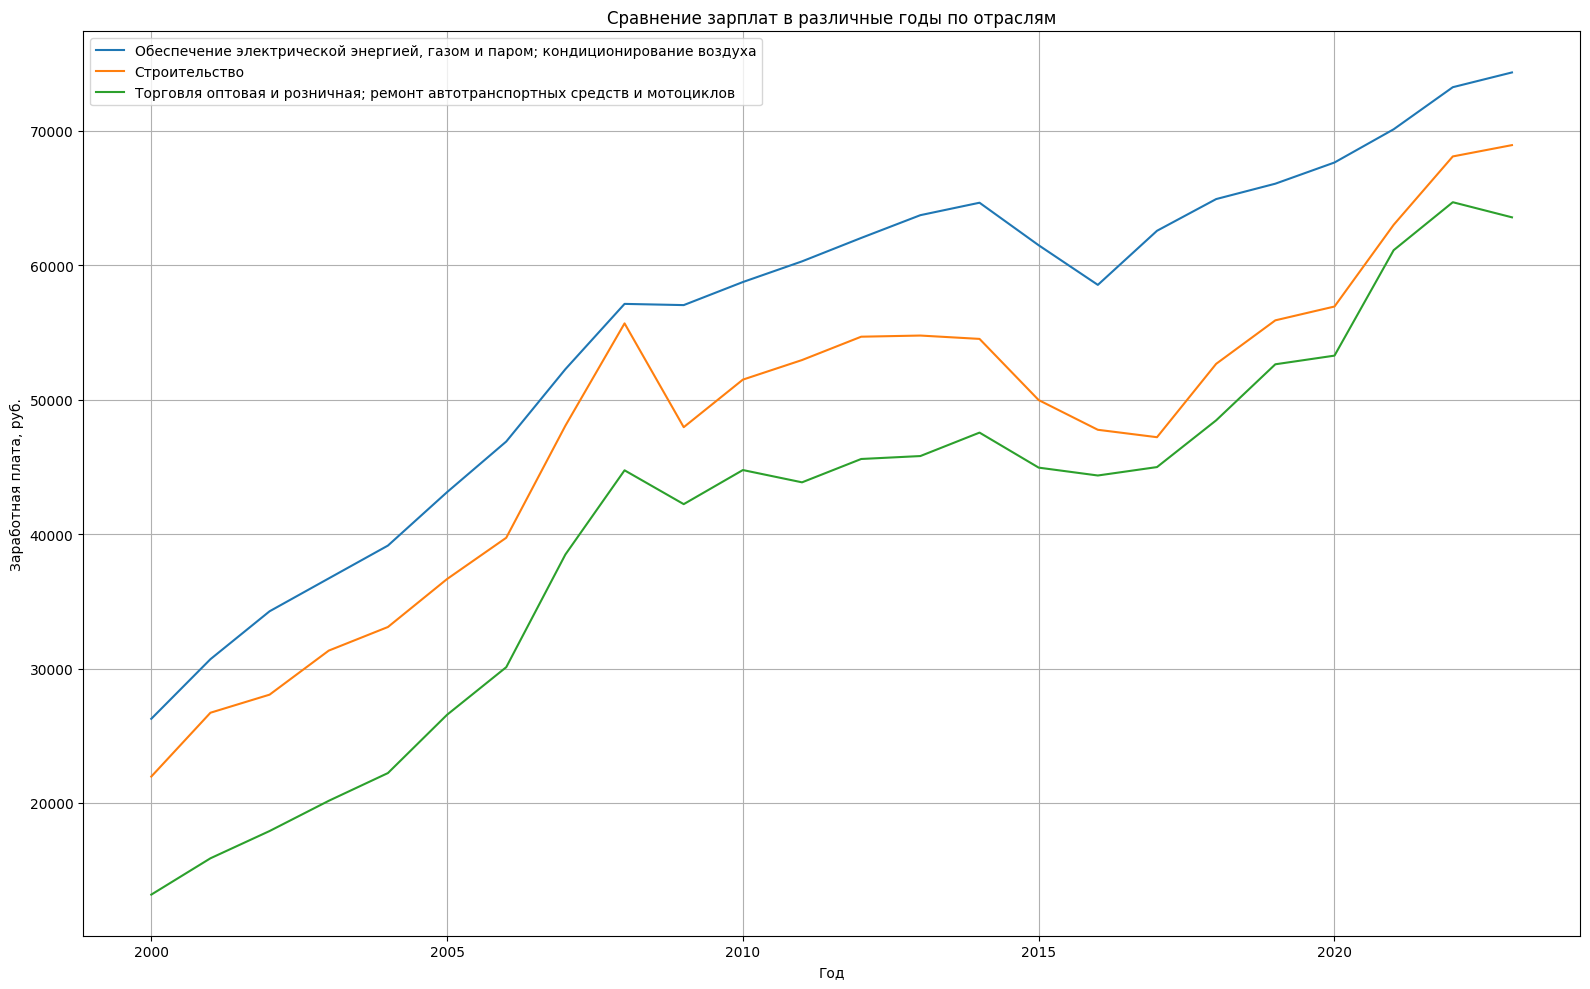

In [36]:
d2023 = data.copy()
for year in range(2000, 2024):
    d2023[year] = compound(year, 2023, d2023[year])

plt.figure(figsize=(16, 10))
for sphere in spheres:
    dt = d2023[d2023['Наименование отрасли'] == sphere].drop(columns=['Наименование отрасли']).squeeze()
    plt.plot(dt.index, dt.values, label=sphere)
plt.title('Сравнение зарплат в различные годы по отраслям')
plt.xlabel('Год')
plt.ylabel('Заработная плата, руб.')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
for sphere in spheres:
    data_sphere = d2000[d2000['Наименование отрасли'] == sphere]
    mean_val = (data_sphere[2023] / data_sphere[2000]).iloc[0]
    print(data_sphere.iloc[0,0], mean_val)

Обеспечение электрической энергией, газом и паром; кондиционирование воздуха 3.1677149077252174
Строительство 3.512292720096291
Торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов 5.395574942885249


In [38]:
dt = data.transpose()
dt = dt.set_axis(dt.iloc[0], axis='columns')
dt = dt.iloc[1:]
dt.index.name = 'Год'
dt.index = dt.index.map(int)
dt = dt.pct_change() * 100.0
dt = dt.iloc[1:]
dt.join(inf)[spheres + ['Инфляция']].transpose()

Год,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
"Обеспечение электрической энергией, газом и паром; кондиционирование воздуха",40.497386,32.348697,23.271544,19.439415,23.091254,20.589811,21.514714,22.262355,13.101472,12.072821,...,7.997084,5.909561,7.497626,12.623836,6.386268,6.106525,5.508967,8.742405,13.230527,13.596834
Строительство,46.196682,24.553676,28.496536,18.262179,23.794269,20.197284,31.871711,29.585444,-2.432432,16.827427,...,5.965763,2.064455,7.917223,4.162749,14.371739,10.675269,4.945121,16.107560,17.143974,13.303150
Торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов,44.834333,33.726960,29.499169,23.451261,33.547348,25.683369,39.361741,30.071539,6.908102,15.335305,...,10.502508,5.257607,11.440977,6.868132,10.443250,13.240605,4.310237,20.354456,14.720136,9.974899
Инфляция,18.580000,15.060000,11.990000,11.740000,10.910000,9.000000,11.870000,13.280000,8.800000,8.780000,...,11.360000,12.910000,5.380000,2.520000,4.270000,3.050000,4.910000,8.390000,11.920000,7.420000


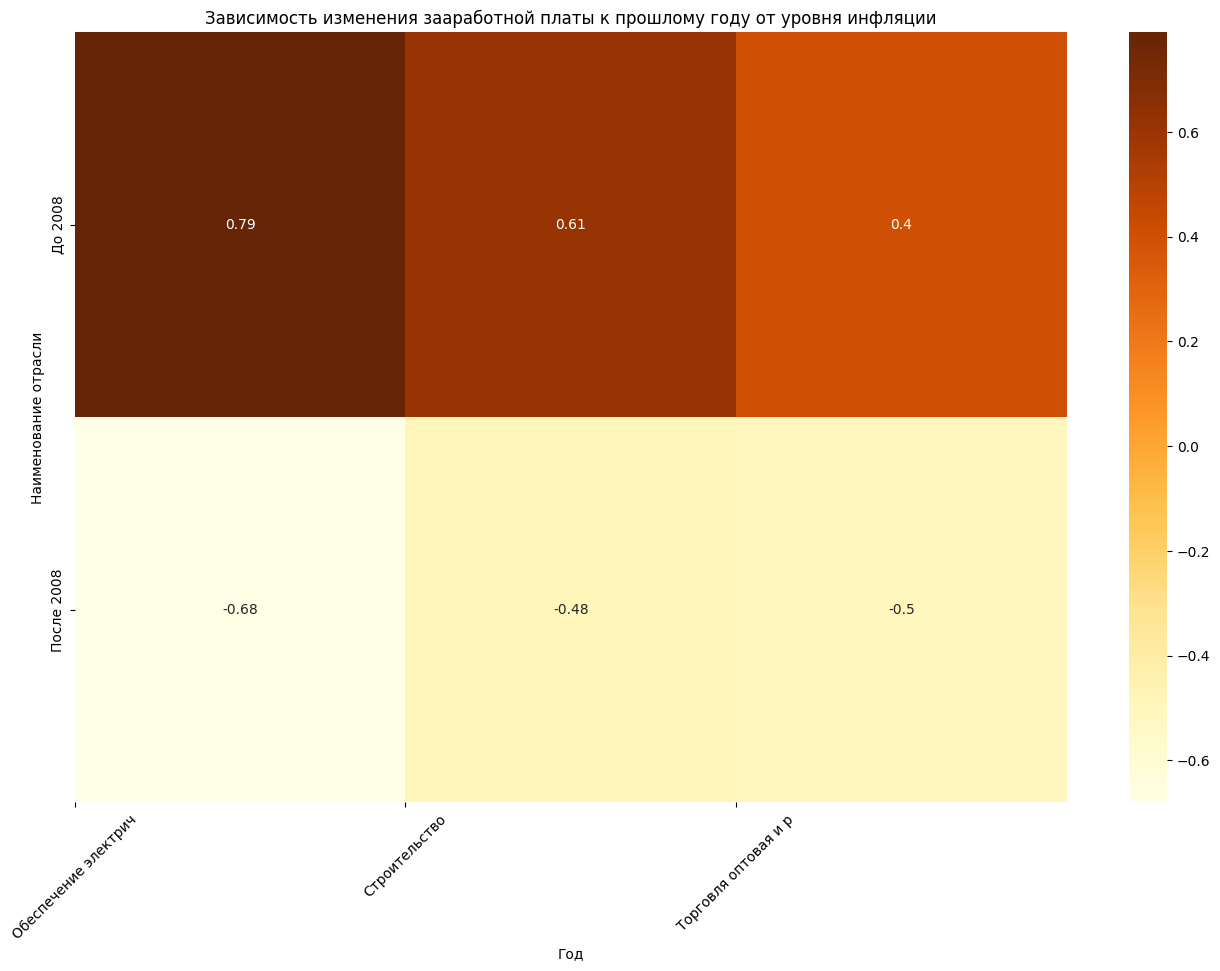

In [39]:
# корреляция изменения з/п с инфляцией предыдущего года до и после примерно 2008 г
dx = dt.subtract(inf[inf.index > 2000], axis=0)
dx = dx[spheres]
dx = pd.concat([dx[dx.index <= 2008].corrwith(inf).round(2), dx[dx.index > 2008].corrwith(inf).round(2)], axis=1)
dx = dx.rename({ 0: 'До 2008', 1: 'После 2008' }, axis=1)
# Создаем тепловую карту
plt.figure(figsize=(16, 10))
sns.heatmap(dx.transpose(), annot=True, cmap='YlOrBr')
plt.title('Зависимость изменения зааработной платы к прошлому году от уровня инфляции')
plt.xlabel('Год')
plt.ylabel('Наименование отрасли')
plt.xticks(ticks=range(len(dx.index)), labels=[str(year)[:20] for year in dx.index], rotation=45)
plt.show()

***Выводы:***

__Средняя реальная зарплата выросла в 3-5 раз за 2000-2023, что значительно отличается от первоначально полученного результата: рост номинальной средней зарплатаы (без учета инфляции) отличается от скорректированного показателя более чем в 7 раз. Инфляция оказала огромное влияние на показатель изменения зарплаты. Переломным моментом является 2008 год, когда случился кризис, это видно из корреляционной карты. До кризиса зарплата росла выше инфляции.__